# ML2 Homework 3
Castillo, Cruz, Madarang, Valera

In [2]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

random_state = 33

/Users/katecastillo/.pyenv/versions/3.11.9/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("../../../data/customer_churn_telecom_services.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns = df.columns.str.lower()
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
cat_cols = [
    "gender", "partner", "dependents", "phoneservice", "multiplelines", 
    "internetservice", "onlinesecurity", "onlinebackup", "deviceprotection",
    "techsupport", "streamingtv", "streamingmovies", "contract", "paperlessbilling",
    "paymentmethod", "churn"
]

# encoder = LabelEncoder()
# df[cat_cols] = df[cat_cols].apply(lambda col: encoder.fit_transform(col))

In [6]:
df_model = df.copy()

In [7]:
label_encoders = {}
for col in cat_cols:
    encoder = LabelEncoder()
    df_model[col] = encoder.fit_transform(df_model[col])
    label_encoders[col] = {index: label for index, label in enumerate(encoder.classes_)}

In [8]:
label_encoders

{'gender': {0: 'Female', 1: 'Male'},
 'partner': {0: 'No', 1: 'Yes'},
 'dependents': {0: 'No', 1: 'Yes'},
 'phoneservice': {0: 'No', 1: 'Yes'},
 'multiplelines': {0: 'No', 1: 'No phone service', 2: 'Yes'},
 'internetservice': {0: 'DSL', 1: 'Fiber optic', 2: 'No'},
 'onlinesecurity': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'onlinebackup': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'deviceprotection': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'techsupport': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'streamingtv': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'streamingmovies': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
 'paperlessbilling': {0: 'No', 1: 'Yes'},
 'paymentmethod': {0: 'Bank transfer (automatic)',
  1: 'Credit card (automatic)',
  2: 'Electronic check',
  3: 'Mailed check'},
 'churn': {0: 'No', 1: 'Yes'}}

In [9]:
df.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [10]:
df_model.dropna(inplace=True)

In [11]:
df_model.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [12]:
df_model.churn.value_counts()

churn
0    5163
1    1869
Name: count, dtype: int64

In [13]:
X = df_model.drop(["churn"], axis=1)
y = df_model["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
smote = SMOTE(random_state=random_state)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [16]:
model = CatBoostClassifier()
model.fit(X_train_scaled, y_train_resampled)

Learning rate set to 0.025395
0:	learn: 0.6773073	total: 91.3ms	remaining: 1m 31s
1:	learn: 0.6634311	total: 98.9ms	remaining: 49.3s
2:	learn: 0.6487773	total: 106ms	remaining: 35.1s
3:	learn: 0.6355981	total: 111ms	remaining: 27.6s
4:	learn: 0.6224987	total: 117ms	remaining: 23.3s
5:	learn: 0.6110763	total: 126ms	remaining: 20.9s
6:	learn: 0.6008379	total: 134ms	remaining: 19s
7:	learn: 0.5924618	total: 140ms	remaining: 17.3s
8:	learn: 0.5830831	total: 145ms	remaining: 16s
9:	learn: 0.5733953	total: 153ms	remaining: 15.2s
10:	learn: 0.5658285	total: 159ms	remaining: 14.3s
11:	learn: 0.5583456	total: 165ms	remaining: 13.6s
12:	learn: 0.5514062	total: 170ms	remaining: 12.9s
13:	learn: 0.5429373	total: 175ms	remaining: 12.4s
14:	learn: 0.5349780	total: 182ms	remaining: 11.9s
15:	learn: 0.5285565	total: 187ms	remaining: 11.5s
16:	learn: 0.5227267	total: 192ms	remaining: 11.1s
17:	learn: 0.5162609	total: 197ms	remaining: 10.8s
18:	learn: 0.5113875	total: 203ms	remaining: 10.5s
19:	learn: 0

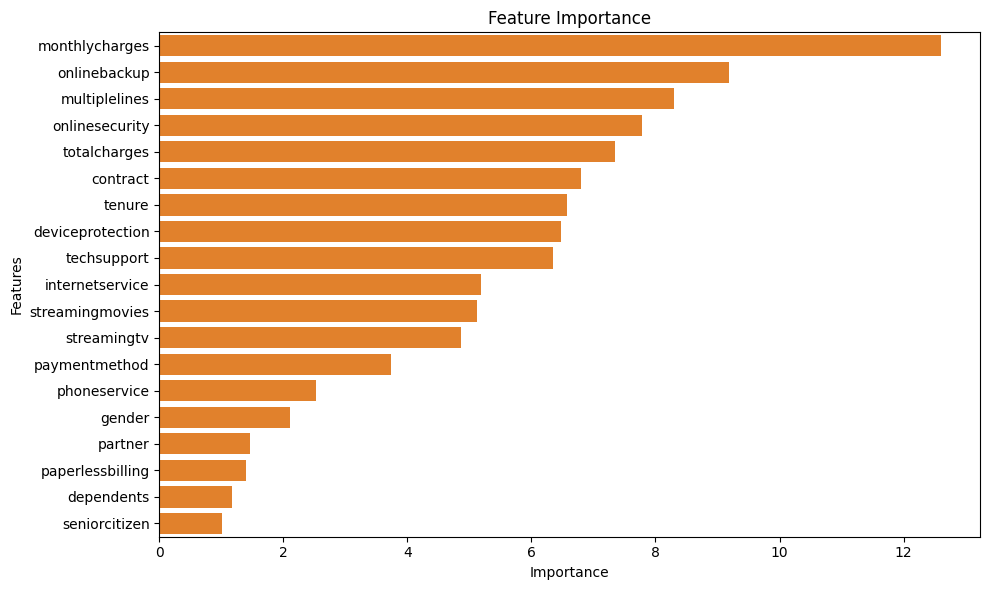

In [17]:
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

cat_boost_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=cat_boost_importance["Importance"], y=cat_boost_importance["Feature"])
fig = sns.barplot(x=cat_boost_importance["Importance"], y=cat_boost_importance["Feature"]).get_figure()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("Catboost_feature_importance.png", dpi=200)
plt.show()

In [18]:
X_train_scaled_cols = pd.DataFrame(X_train_scaled, columns=X_train.columns)

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train_scaled_cols)

In [19]:
label_encoders["dependents"]

{0: 'No', 1: 'Yes'}

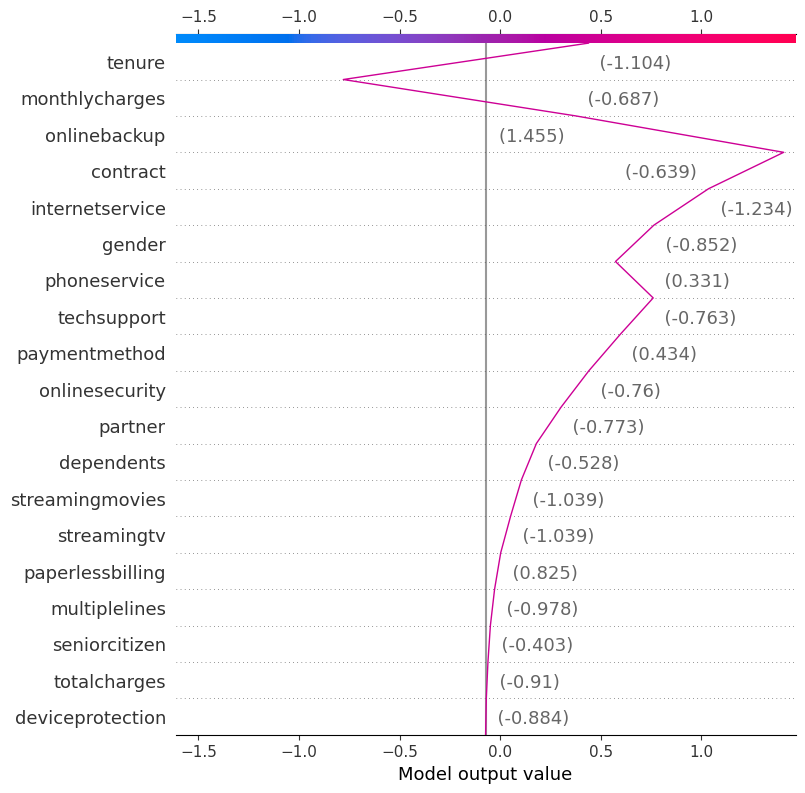

In [22]:
shap.decision_plot(explainer.expected_value, shap_values.values[0], X_train_scaled_cols.iloc[0], link='identity', show=True)

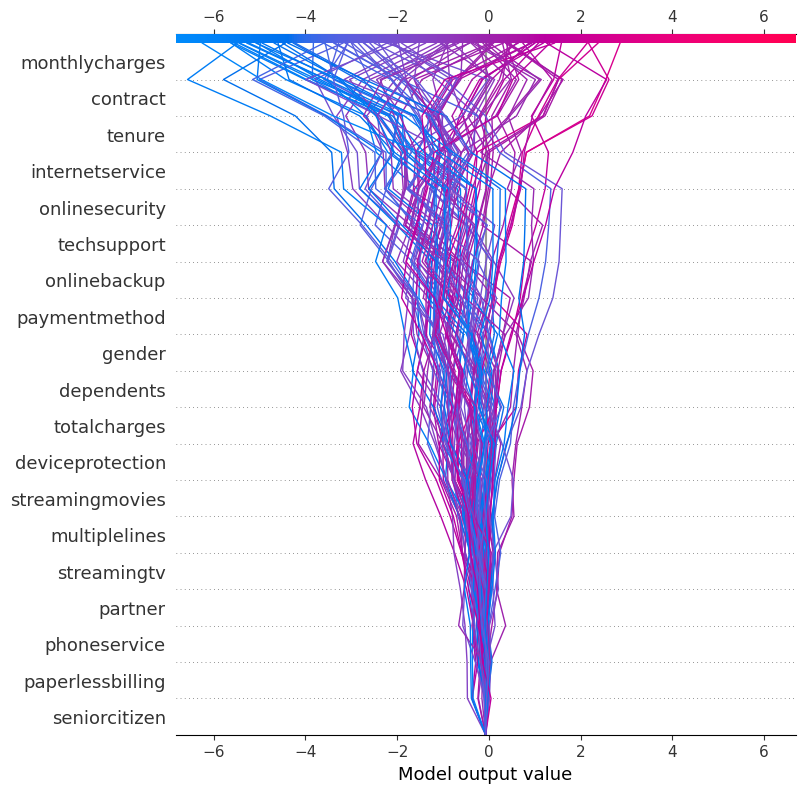

In [24]:
# visualize the first prediction's explanation with a decision plot
shap.decision_plot(explainer.expected_value, shap_values.values[:100], X_train_scaled_cols[:100], link='identity', show=True)

In [26]:
shap.initjs()

shap.plots.force(shap_values[0])

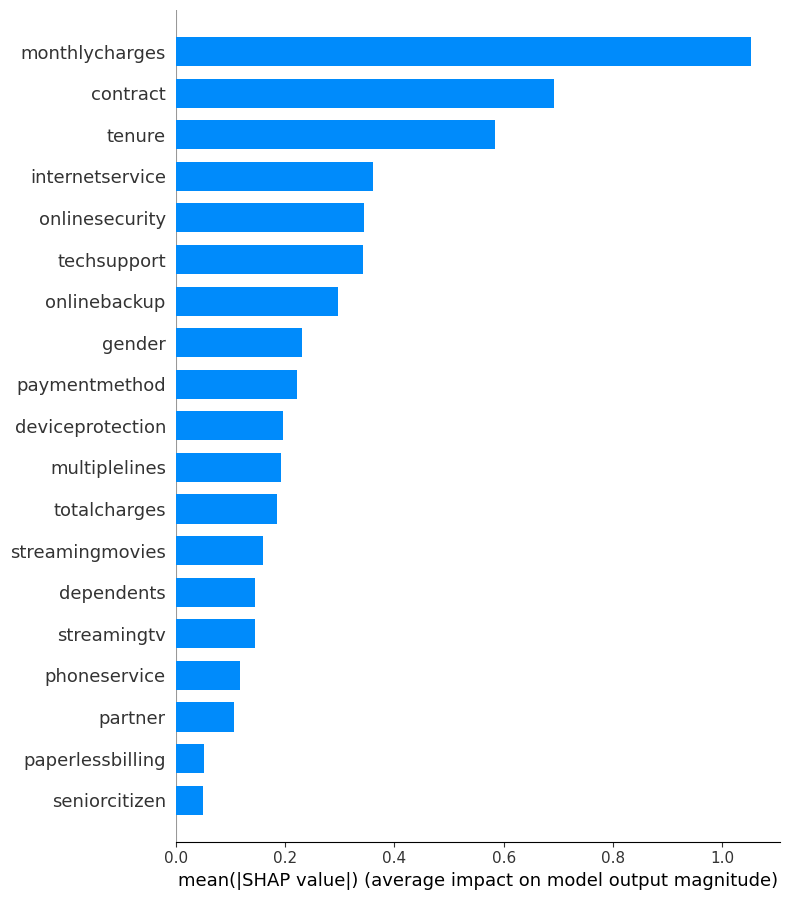

In [20]:
shap.summary_plot(shap_values, X_train_scaled_cols, plot_type="bar")

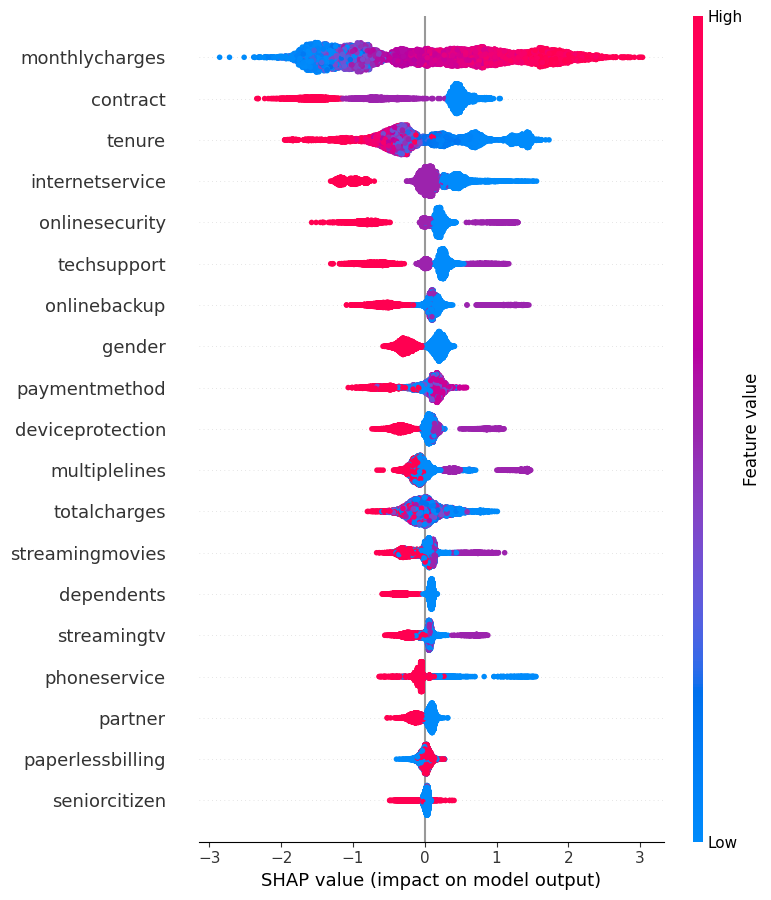

In [21]:
shap.summary_plot(shap_values, X_train_scaled_cols)

In [18]:
label_encoders

{'gender': {0: 'Female', 1: 'Male'},
 'partner': {0: 'No', 1: 'Yes'},
 'dependents': {0: 'No', 1: 'Yes'},
 'phoneservice': {0: 'No', 1: 'Yes'},
 'multiplelines': {0: 'No', 1: 'No phone service', 2: 'Yes'},
 'internetservice': {0: 'DSL', 1: 'Fiber optic', 2: 'No'},
 'onlinesecurity': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'onlinebackup': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'deviceprotection': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'techsupport': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'streamingtv': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'streamingmovies': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
 'paperlessbilling': {0: 'No', 1: 'Yes'},
 'paymentmethod': {0: 'Bank transfer (automatic)',
  1: 'Credit card (automatic)',
  2: 'Electronic check',
  3: 'Mailed check'},
 'churn': {0: 'No', 1: 'Yes'}}